### Self-implemented K-MEANS
This is a short illustration of a self-implemented k-means clustering algorithm



In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

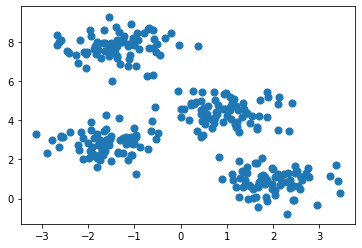

In [3]:
X, y_true = make_blobs(n_samples=300, centers = 4,
                    cluster_std=0.6, random_state=0)
plt.scatter(X[:,0],X[:,1],s=50)

In [150]:
class kmeans():
    def __init__(self,n_clusters):
        self.n_clusters = n_clusters
        self.centers = []
        self.clusters = np.array([])
    def init_centers(self,X):
        """
        initialize n_cluster centers to some random number within the right ranges
        """
        dim = len(X[0])
        
        U = X.max(0) #array 1 by dim
        L = X.min(0)
        self.centers = np.random.random_sample((self.n_clusters,dim))*(U-L)+L
        
        
    def fit(self,X):
        self.init_centers(X)
        n = len(X[:,1])
        
        #assign each value to the cluster that minimize distance to the center 
        #can be done with scipy.spatial.distance.cdist
        n_itr = 0
        self.clusters = np.array([np.argmin(((x-self.centers)**2).sum(axis = 1)) for x in X])

        while n_itr<100:
            n_itr+=1

            #update the centers
            for i in range(len(self.centers)):
                self.centers[i] = np.mean(X[self.clusters==i,:],axis=0)
            #update the clusters
            new_clusters = np.array([np.argmin(((x-self.centers)**2).sum(axis = 1)) for x in X])
            if not np.all(new_clusters==self.clusters):
                self.clusters = new_clusters
            else:
                break
                
    def predict(self,X):
        return self.clusters

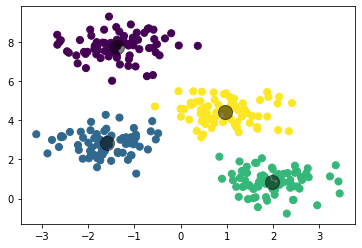

In [151]:

kmean = kmeans(n_clusters=4)
kmean.fit(X)
y_means = kmean.predict(X)
plt.scatter(X[:,0],X[:,1], c = y_means,s=50,cmap = 'viridis')
centers = kmean.centers
plt.scatter(centers[:,0], centers[:,1],c = 'black',s = 200, alpha = 0.5)